<a href="https://colab.research.google.com/github/mariellabanez/mariellabanez/blob/main/LatentDirichletAllocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>INSTALLATION

In [ ]:
!python -m spacy download en_core_web_sm

2023-10-24 01:52:55.584965: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-24 01:52:55.585058: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-24 01:52:55.585097: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-24 01:52:55.595662: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-24 01:52:56.910767: W tensorflow/compiler/

In [ ]:
pip install funcy

In [ ]:
pip install tzdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
pip install --no-deps pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.2 MB/s eta 0:00:00


In [ ]:
!pip install pandas==1.5.3

<h2>IMPORT LIBRARIES

In [ ]:
import pandas as pd
import pandas.core.indexes.numeric
import os
import spacy
import re
import gensim
from gensim.utils import simple_preprocess
from wordcloud import WordCloud # Import the wordcloud library
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
#visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<h2>IMPORT CSV FILE

In [ ]:
df = pd.read_csv('/content/maharlika - maharlika.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title
0,Marcos Suspends Philippine Wealth Fund Pending...
1,"Nope, Maharlika fund IRR suspension isnt due t..."
2,Marcos Jr. suspends Maharlika Investment Funds...
3,Maharlika fund implementation suspended for fu...
4,Marcos suspends Maharlika fund implementation ...


<h2>DATA CLEANING

In [ ]:
# Remove punctuation
df['text_processed'] = df['Title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df['text_processed'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence '\.'
<>:2: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-9-f61b4ef81c59>:2: DeprecationWarning: invalid escape sequence '\.'
  df['text_processed'] = df['Title'].map(lambda x: re.sub('[,\.!?]', '', x))


0    marcos suspends philippine wealth fund pending...
1    nope maharlika fund irr suspension isnt due to...
2    marcos jr suspends maharlika investment funds ...
3    maharlika fund implementation suspended for fu...
4    marcos suspends maharlika fund implementation ...
Name: text_processed, dtype: object

<h2>EXPLORATORY ANALYSIS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


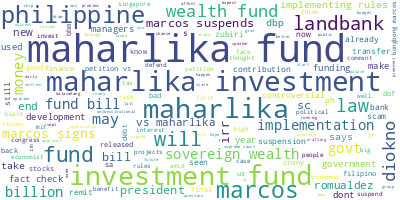

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(df['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

<h2>TOKENIZATION

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data = df.text_processed.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

['marcos', 'suspends', 'philippine', 'wealth', 'fund', 'pending', 'further', 'study']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h2>PHRASE MODELING

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop_words = stopwords.words('english','filipino')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['suspend', 'philippine', 'wealth', 'fund', 'pende', 'study']


<h2>DATA TRANSFORMATION

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h2>LATENT DIRICHLET ALLOCATION MODEL TRAINING

In [ ]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=2,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.028*"maharlika" + 0.012*"well" + 0.011*"fund" + 0.011*"philippine" + '
  '0.009*"scam" + 0.008*"get" + 0.007*"business" + 0.007*"see" + 0.007*"go" + '
  '0.006*"funding"'),
 (1,
  '0.104*"fund" + 0.040*"maharlika" + 0.011*"investment" + 0.010*"money" + '
  '0.009*"wealth" + 0.008*"law" + 0.008*"make" + 0.007*"govt" + 0.007*"bill" + '
  '0.007*"landbank"')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h2> VISUALIZATION

In [ ]:
#visualize the topic
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.108892  0.0       1        1  62.919145
0     -0.108892  0.0       2        1  37.080855, topic_info=           Term        Freq       Total Category  logprob  loglift
0          fund  152.000000  152.000000  Default  30.0000  30.0000
171        well   10.000000   10.000000  Default  29.0000  29.0000
593        scam    8.000000    8.000000  Default  28.0000  28.0000
177         see    6.000000    6.000000  Default  27.0000  27.0000
262    business    6.000000    6.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
12   investment    4.904440   20.218837   Topic2  -5.1067  -0.4244
517       money    4.697209   18.216024   Topic2  -5.1499  -0.3633
621       think    3.705752    7.622218   Topic2  -5.3870   0.2709
58     landbank    4.099795   13.808351   Topic2  -5.2859  -0.2223
312        take    3.477381    9.923225   Topic2  -5.4506  -0.0565

[123 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
512       1  0.841211     affect
392       1  0.481945    already
392       2  0.481945    already
483       2  0.960620  amusement
221       1  0.859255    benefit
...     ...       ...        ...
542       1  0.718503   transfer
542       2  0.307930   transfer
5         1  1.008413     wealth
171       1  0.097126       well
171       2  0.971258       well

[116 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

<h2> OPTIMIZATION

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
  coherence_values = []
  model_list = []

  for num_topics in range(start, limit, step):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=20, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


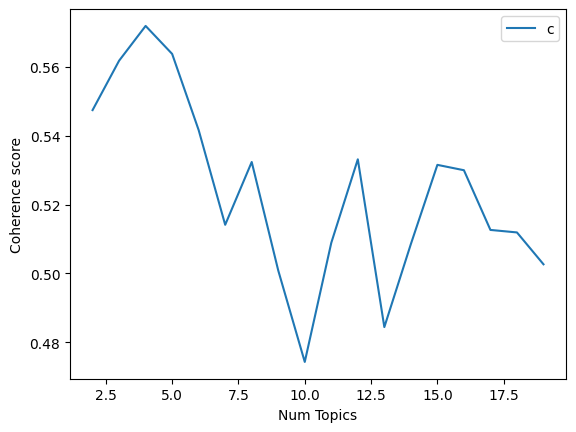

In [ ]:
#show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
  print("Num topics =", m, " has coherence value of", round(cv,4))

Num topics = 2  has coherence value of 0.5475
Num topics = 3  has coherence value of 0.5618
Num topics = 4  has coherence value of 0.5719
Num topics = 5  has coherence value of 0.5638
Num topics = 6  has coherence value of 0.5416
Num topics = 7  has coherence value of 0.5141
Num topics = 8  has coherence value of 0.5324
Num topics = 9  has coherence value of 0.5008
Num topics = 10  has coherence value of 0.4742
Num topics = 11  has coherence value of 0.5089
Num topics = 12  has coherence value of 0.5332
Num topics = 13  has coherence value of 0.4844
Num topics = 14  has coherence value of 0.5085
Num topics = 15  has coherence value of 0.5315
Num topics = 16  has coherence value of 0.53
Num topics = 17  has coherence value of 0.5126
Num topics = 18  has coherence value of 0.5119
Num topics = 19  has coherence value of 0.5026


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#select the optimal model and print the topics
optimal_lda_model = model_list[4]
model_topics = optimal_lda_model.show_topics(formatted=False)
model_fin = optimal_lda_model.print_topics(num_words=10)
model_fin

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.048*"maharlika" + 0.028*"fund" + 0.012*"investment" + 0.012*"money" + 0.011*"govt" + 0.010*"landbank" + 0.010*"final" + 0.008*"make" + 0.007*"end" + 0.007*"already"'),
 (1,
  '0.125*"fund" + 0.069*"maharlika" + 0.019*"wealth" + 0.015*"philippine" + 0.015*"investment" + 0.013*"law" + 0.013*"sovereign" + 0.011*"suspend" + 0.011*"bill" + 0.009*"implementation"'),
 (2,
  '0.040*"fund" + 0.022*"maharlika" + 0.013*"ready" + 0.010*"defend" + 0.010*"suspension" + 0.010*"bad" + 0.010*"economist" + 0.010*"board" + 0.008*"law" + 0.007*"irr"'),
 (3,
  '0.082*"fund" + 0.052*"maharlika" + 0.016*"well" + 0.013*"scam" + 0.009*"philippine" + 0.009*"question" + 0.007*"think" + 0.007*"wealth" + 0.007*"new" + 0.007*"bill"'),
 (4,
  '0.041*"fund" + 0.013*"funding" + 0.011*"budget" + 0.010*"suspend" + 0.010*"sentral" + 0.009*"philippine" + 0.009*"say" + 0.009*"management" + 0.009*"proceed" + 0.009*"include"'),
 (5,
  '0.054*"fund" + 0.019*"maharlika" + 0.019*"get" + 0.016*"investment" + 0.011*"tax

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.064300  0.118406       1        1  38.759018
3      0.059598 -0.021732       2        1  14.405887
0     -0.058651  0.022480       3        1  13.855095
4      0.063630 -0.090645       4        1  11.734958
5     -0.098400  0.001486       5        1  10.707881
2     -0.030477 -0.029996       6        1  10.537160, topic_info=           Term        Freq       Total Category  logprob  loglift
13    maharlika  100.000000  100.000000  Default  30.0000  30.0000
143         get    8.000000    8.000000  Default  29.0000  29.0000
0          fund  172.000000  172.000000  Default  28.0000  28.0000
171        well    9.000000    9.000000  Default  27.0000  27.0000
12   investment   21.000000   21.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
660     problem    0.824872    3.611635   Topic6  -5.6312   0.7736
237         act    0.824829    2.827369   Topic6  -5.6312   1.0183
194     finance    0.824606    7.422612   Topic6  -5.6315   0.0529
56         give    0.824438    5.757296   Topic6  -5.6317   0.3067
347     project    0.824393    6.638881   Topic6  -5.6318   0.1642

[378 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
624       2  0.708434        able
446       4  0.701041  accelerate
237       2  0.353686         act
237       5  0.353686         act
237       6  0.353686         act
...     ...       ...         ...
188       2  0.152561        year
188       3  0.305123        year
188       4  0.152561        year
188       5  0.152561        year
479       6  0.700635       yield

[510 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 6, 3])

In [ ]:
topic_labels = ["Legal Implication and Implementation", "Investment and Financial Initiatives", "Legal Framework and Investment Strategies",
                "Economic Growth and Development", "Legal Petitions and Concerns", "Rules and Implementation"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Format and print the LDA results
for topic, keywords in model_fin:
    keyword_list = keywords.split(' + ')
    formatted_keywords = [keyword.split('*')[-1].strip('"') for keyword in keyword_list]
    print(f"{topic_labels[topic]} -> ", end="")
    for i, keyword in enumerate(formatted_keywords):
        print(f"{keyword}, ", end="")
    print("\n")

Legal Implication and Implementation -> maharlika, fund, investment, money, govt, landbank, final, make, end, already, 

Investment and Financial Initiatives -> fund, maharlika, wealth, philippine, investment, law, sovereign, suspend, bill, implementation, 

Legal Framework and Investment Strategies -> fund, maharlika, ready, defend, suspension, bad, economist, board, law, irr, 

Economic Growth and Development -> fund, maharlika, well, scam, philippine, question, think, wealth, new, bill, 

Legal Petitions and Concerns -> fund, funding, budget, suspend, sentral, philippine, say, management, proceed, include, 

Rules and Implementation -> fund, maharlika, get, investment, taxis, steal, affect, government, invest, interest, 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<h2>EVALUATION METRICS

In [ ]:
# Perplexity
# a measure of how good the model is; lower the better.
perplexity_lda = optimal_lda_model.log_perplexity(corpus, total_docs=308)
print('Perplexity: ', perplexity_lda)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=optimal_lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity:  -6.903863917072506
Coherence Score:  0.5416496101395444


https://youtu.be/nNvPvvuPnGs?si=OP1aLc1-S8vv5pN8

<h2>LABELING

In [ ]:
# Assign topics to documents and label the documents
document_labels = []
for i, doc in enumerate(data_lemmatized):
    topics = optimal_lda_model.get_document_topics(corpus[i])
    topics = sorted(topics, key=lambda x: x[1], reverse=True)
    topic_id, topic_prob = topics[0]

    # Assign labels based on topic IDs
    label = topic_labels[topic_id]

    document_labels.append(label)

document_labels

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Investment and Financial Initiatives',
 'Legal Petitions and Concerns',
 'Investment and Financial Initiatives',
 'Legal Petitions and Concerns',
 'Legal Petitions and Concerns',
 'Investment and Financial Initiatives',
 'Investment and Financial Initiatives',
 'Rules and Implementation',
 'Investment and Financial Initiatives',
 'Investment and Financial Initiatives',
 'Investment and Financial Initiatives',
 'Investment and Financial Initiatives',
 'Investment and Financial Initiatives',
 'Legal Petitions and Concerns',
 'Legal Implication and Implementation',
 'Investment and Financial Initiatives',
 'Legal Framework and Investment Strategies',
 'Investment and Financial Initiatives',
 'Investment and Financial Initiatives',
 'Investment and Financial Initiatives',
 'Legal Framework and Investment Strategies',
 'Legal Implication and Implementation',
 'Investment and Financial Initiatives',
 'Legal Implication and Implementation',
 'Legal Framework and Investment Strategies',
 'In

In [ ]:
df['topic_label'] = document_labels
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,text_processed,topic_label
0,Marcos Suspends Philippine Wealth Fund Pending...,marcos suspends philippine wealth fund pending...,Investment and Financial Initiatives
1,"Nope, Maharlika fund IRR suspension isnt due t...",nope maharlika fund irr suspension isnt due to...,Legal Petitions and Concerns
2,Marcos Jr. suspends Maharlika Investment Funds...,marcos jr suspends maharlika investment funds ...,Investment and Financial Initiatives
3,Maharlika fund implementation suspended for fu...,maharlika fund implementation suspended for fu...,Legal Petitions and Concerns
4,Marcos suspends Maharlika fund implementation ...,marcos suspends maharlika fund implementation ...,Legal Petitions and Concerns
...,...,...,...
382,It looks like theres something going on again....,it looks like theres something going on agains...,Rules and Implementation
383,we find out its all gone,we find out its all gone,Rules and Implementation
384,There is a move before Bongbong veto this case...,there is a move before bongbong veto this case...,Investment and Financial Initiatives
385,"Declare it as unconstitutional, Supreme Court!",declare it as unconstitutional supreme court,Economic Growth and Development


In [ ]:
from google.colab import files

df.to_csv('assigned_topics.csv', index=False)
files.download('assigned_topics.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>